# Explore buildings

In [1]:
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely import wkt

from geowrangler import grids
import geowrangler.vector_zonal_stats as vzs

import seaborn as sns

/opt/anaconda3/envs/geospatial/lib/python3.9/site-packages/geopandas/_compat.py:123: UserWarning: The Shapely GEOS version (3.11.1-CAPI-1.17.1) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(
/var/folders/lt/_vxm7m7x0hs2v8mx_0zxl5vc0000gn/T/ipykernel_18010/1163743905.py:2: UserWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas will still use PyGEOS by default for now. To force to use and test Shapely 2.0, you have to set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In a future release, GeoPandas will switch to using Shapely by default. If you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (htt

## 1. Read buildings

In [2]:
buildings = gpd.read_file("../data/rizal_buildings.geojson")
buildings.head()

,latitude,longitude,area_in_meters,confidence,full_plus_code,geometry
0,14.537621,121.110581,43.9186,0.8324,7Q63G4Q6+26WW,"POLYGON ((121.11059 14.53758, 121.11055 14.537..."
1,14.753431,121.138113,32.7564,0.6051,7Q63Q43Q+96H8,"POLYGON ((121.13815 14.75339, 121.13806 14.753..."
2,14.532918,121.163196,19.8461,0.6037,7Q63G5M7+578M,"POLYGON ((121.16320 14.53289, 121.16317 14.532..."
3,14.590740,121.182893,445.2835,0.8213,7Q63H5RM+75RG,"POLYGON ((121.18291 14.59061, 121.18289 14.590..."
4,14.609343,121.107028,7.5872,0.6710,7Q63J454+PRJQ,"POLYGON ((121.10702 14.60933, 121.10702 14.609..."


## 2. Read municipalities

In [3]:
mun_bounds = gpd.read_file("../data/rizal_muncities.geojson")
mun_bounds

,municipality,Level,geometry
0,Angono,ADM3,"MULTIPOLYGON (((121.15790 14.54694, 121.15697 ..."
1,Baras,ADM3,"MULTIPOLYGON (((121.26074 14.50479, 121.25503 ..."
2,Binangonan,ADM3,"MULTIPOLYGON (((121.24942 14.30068, 121.25099 ..."
3,Cainta,ADM3,"MULTIPOLYGON (((121.11167 14.63607, 121.10679 ..."
4,Cardona,ADM3,"MULTIPOLYGON (((121.24243 14.31553, 121.23190 ..."
5,City of Antipolo,ADM3,"MULTIPOLYGON (((121.13338 14.65369, 121.13665 ..."
6,Jala-Jala,ADM3,"MULTIPOLYGON (((121.31167 14.28481, 121.31304 ..."
7,Morong,ADM3,"MULTIPOLYGON (((121.21161 14.50616, 121.20974 ..."
8,Pililla,ADM3,"MULTIPOLYGON (((121.36680 14.39138, 121.36920 ..."
9,Rodriguez,ADM3,"MULTIPOLYGON (((121.09973 14.76522, 121.09951 ..."


<Axes: >

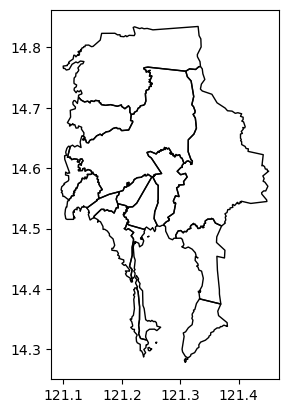

In [4]:
mun_bounds.plot(facecolor="none")

## 3. Get buildings stats per municipality/city

In [5]:
data_gdf = vzs.create_zonal_stats(
    mun_bounds,
    buildings,
    overlap_method="intersects",
    aggregations=[dict(func="count", output="bldg_count", fillna=True),
                 dict(column="confidence", func="mean", output="bldg_confidence_mean", fillna=True),
                 dict(column="area_in_meters", func="mean", output="bldg_area_mean", fillna=True)],
)
data_gdf['area'] = data_gdf['geometry'].to_crs('25393').area/ 10**6
data_gdf['bldg_count_per_sq_km'] = data_gdf['bldg_count']/data_gdf['area']
data_gdf

,municipality,Level,geometry,bldg_count,bldg_confidence_mean,bldg_area_mean,area,bldg_count_per_sq_km
0,Angono,ADM3,"MULTIPOLYGON (((121.15790 14.54694, 121.15697 ...",30559,0.711528,53.087580,14.519041,2104.753405
1,Baras,ADM3,"MULTIPOLYGON (((121.26074 14.50479, 121.25503 ...",21593,0.706813,76.067227,53.842972,401.036553
2,Binangonan,ADM3,"MULTIPOLYGON (((121.24942 14.30068, 121.25099 ...",79638,0.711824,47.659173,53.973771,1475.494451
3,Cainta,ADM3,"MULTIPOLYGON (((121.11167 14.63607, 121.10679 ...",84073,0.719734,70.775829,20.928447,4017.163748
4,Cardona,ADM3,"MULTIPOLYGON (((121.24243 14.31553, 121.23190 ...",12992,0.706235,47.421490,23.914120,543.277370
5,City of Antipolo,ADM3,"MULTIPOLYGON (((121.13338 14.65369, 121.13665 ...",184389,0.710373,57.194269,263.523947,699.704911
6,Jala-Jala,ADM3,"MULTIPOLYGON (((121.31167 14.28481, 121.31304 ...",12037,0.712758,59.342779,43.781927,274.930798
7,Morong,ADM3,"MULTIPOLYGON (((121.21161 14.50616, 121.20974 ...",21603,0.711134,66.632589,34.568275,624.937173
8,Pililla,ADM3,"MULTIPOLYGON (((121.36680 14.39138, 121.36920 ...",16524,0.716576,68.134324,66.291281,249.263548
9,Rodriguez,ADM3,"MULTIPOLYGON (((121.09973 14.76522, 121.09951 ...",92356,0.699472,53.316394,234.799624,393.339641


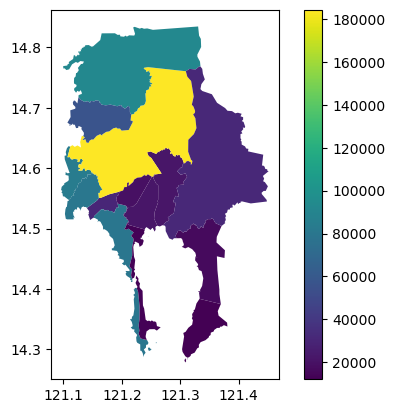

In [6]:
data_gdf.plot(column='bldg_count', cmap='viridis', legend=True)
plt.savefig("../figs/open_bldgs_count_map.png", facecolor='white', transparent=False)

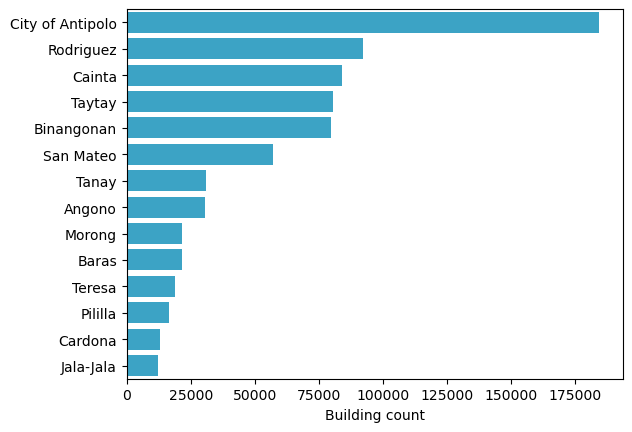

In [7]:
# Building count
sns.barplot(data_gdf.sort_values(by='bldg_count', ascending=False)\
            ,x="bldg_count",y="municipality", color='#25afdc')
plt.ylabel("")
plt.xlabel("Building count")
plt.savefig("../figs/open_bldgs_count_per_area.png", facecolor='white', transparent=False)

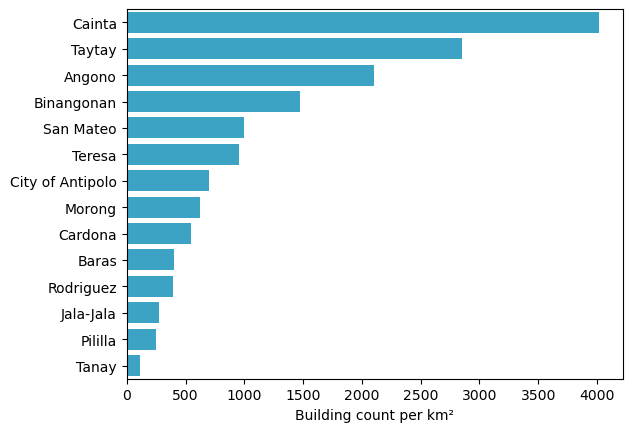

In [8]:
# Building count per unit area
sns.barplot(data_gdf.sort_values(by='bldg_count_per_sq_km', ascending=False)\
            ,x="bldg_count_per_sq_km",y="municipality", color='#25afdc')
plt.ylabel("")
plt.xlabel("Building count per km²")
plt.savefig("../figs/open_bldgs_count_per_area.png", facecolor='white', transparent=False)

In [9]:
buildings['area_in_meters'].describe()

count    742539.000000
mean         57.611541
std          96.177880
min           2.142000
25%          20.971950
50%          35.714100
75%          64.871800
max        7800.220300
Name: area_in_meters, dtype: float64

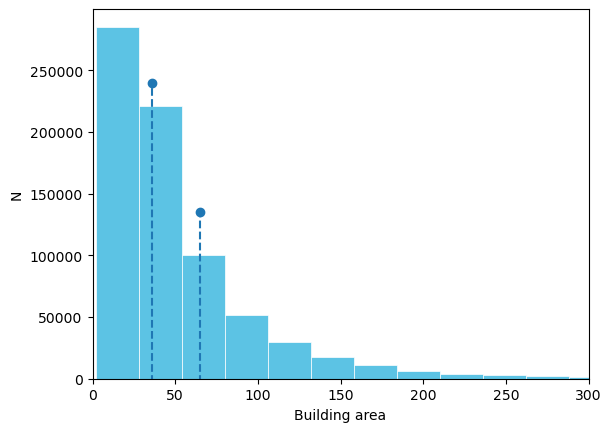

In [10]:
# Building count per unit area
sns.histplot(data = buildings, bins=300, edgecolor='w', linewidth=0.5, \
            x="area_in_meters", color='#25afdc')
ylims = plt.gca().get_ylim()

stats = buildings['area_in_meters'].describe()
plt.axvline(x= stats['50%'], ymin=-0.1, ymax=0.8,  ls='--', color='C0', marker ='o')

plt.axvline(x= stats['75%'], ymin=-0.1, ymax=0.45, ls='--', color='C0', marker ='o')

plt.xlim([0,300])
plt.ylim(ylims)
plt.ylabel("N")
plt.xlabel("Building area")
plt.savefig("../figs/open_bldgs_area_hist.png", facecolor='white', transparent=False)

## 3. Get building stats per grid

In [11]:
# Setup generator
bing_tile_grid_generator = grids.BingTileGridGenerator(15)

In [12]:
# Generate bing tiles
bing_tile_gdf = bing_tile_grid_generator.generate_grid(mun_bounds)

/opt/anaconda3/envs/geospatial/lib/python3.9/site-packages/shapely/predicates.py:798: RuntimeWarning: invalid value encountered in intersects
  return lib.intersects(a, b, **kwargs)


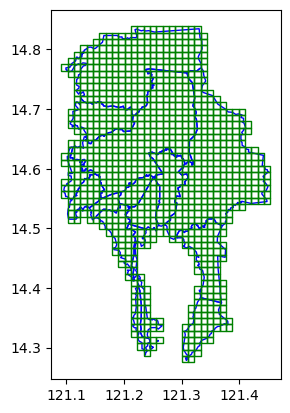

In [13]:
ax = mun_bounds.plot(facecolor="none", edgecolor="blue")
ax = bing_tile_gdf.plot(ax=ax, facecolor="none", edgecolor="green")

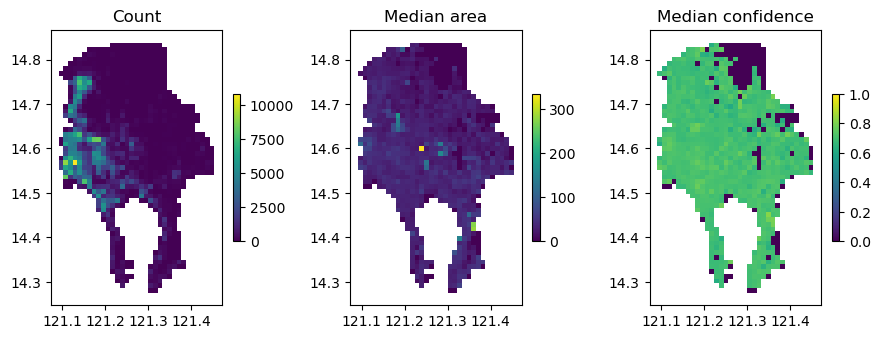

In [14]:
data_gdf = vzs.create_zonal_stats(
    bing_tile_gdf,
    buildings,
    overlap_method="intersects",
    aggregations=[dict(func="count", output="bldg_count", fillna=True),
                 dict(column="confidence", func="median", output="bldg_confidence_median", fillna=True),
                 dict(column="area_in_meters", func="median", output="bldg_area_median", fillna=True)],
)

fig,axs = plt.subplots(1,3, figsize=(9,4))
data_gdf.plot(column='bldg_count', cmap='viridis', legend=True, legend_kwds={'shrink': 0.4},  ax=axs[0])
axs[0].set_title('Count')
data_gdf.plot(column='bldg_area_median', cmap='viridis', legend=True, legend_kwds={'shrink': 0.4}, ax=axs[1])
axs[1].set_title('Median area')
data_gdf.plot(column='bldg_confidence_median', vmax=1, cmap='viridis', legend=True, legend_kwds={'shrink': 0.4}, ax=axs[2])
axs[2].set_title('Median confidence')
fig.tight_layout()
plt.savefig("../figs/open_bldgs_gridded_stats.png", facecolor='white', transparent=False)